#  MD.AHSAN HABIB(232-25-034)

---
ADA TASK- FALL 2023


**IMPORTING ALL NECESSARY LIBRARIES**

---



In [136]:
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

**IMPORTING GIVEN DATASET**

---



In [137]:
from google.colab import files
files.upload()

Saving NPK Dataset.csv to NPK Dataset (3).csv


{'NPK Dataset (3).csv': b'Date,Time,Input Organic Fertilizer (gm),Nitrogen,Phosporus,Potasium,Temperature,Moisture,Location,Organic Fertilizer\r\n29.10.2023,11:05 AM,100,48 mg/kg,119 mg/kg,107 mg/kg,26,859,"Ashulia,Savar,Dhaka",\r\n29.10.2023,12:45 PM,,50 mg/kg,124 mg/kg,113 mg/kg,27,863,"Ashulia,Savar,Dhaka",\r\n30.10.2023,10:20 AM,,53 mg/kg,120 mg/kg,118 mg/kg,29,853,"Ashulia,Savar,Dhaka",\r\n30.10.2023,10:25 AM,,54 mg/kg,122 mg/kg,120 mg/kg,29,873,"Ashulia,Savar,Dhaka",\r\n30.10.2023,10:30 AM,,54 mg/kg,122 mg/kg,120 mg/kg,29,852,"Ashulia,Savar,Dhaka",\r\n30.10.2023,10:45 AM,,56 mg/kg,123 mg/kg,121 mg/kg,29,870,"Ashulia,Savar,Dhaka",\r\n30.10.2023,10:46 AM,,56 mg/kg,123 mg/kg,121 mg/kg,29,861,"Ashulia,Savar,Dhaka",\r\n30.10.2023,10:47 AM,,56 mg/kg,123 mg/kg,121 mg/kg,29,861,"Ashulia,Savar,Dhaka",\r\n30.10.2023,10:50 AM,,56 mg/kg,123 mg/kg,121 mg/kg,29,872,"Ashulia,Savar,Dhaka",\r\n30.10.2023,11:10 AM,,57 mg/kg,123 mg/kg,121 mg/kg,29,875,"Ashulia,Savar,Dhaka",\r\n31.10.2023,12:46 PM,,

**READING DATASET**

---



In [138]:
df = pd.read_csv('NPK Dataset.csv')
df.head()

,Date,Time,Input Organic Fertilizer (gm),Nitrogen,Phosporus,Potasium,Temperature,Moisture,Location,Organic Fertilizer
0,29.10.2023,11:05 AM,100.0,48 mg/kg,119 mg/kg,107 mg/kg,26,859,"Ashulia,Savar,Dhaka",NaN
1,29.10.2023,12:45 PM,NaN,50 mg/kg,124 mg/kg,113 mg/kg,27,863,"Ashulia,Savar,Dhaka",NaN
2,30.10.2023,10:20 AM,NaN,53 mg/kg,120 mg/kg,118 mg/kg,29,853,"Ashulia,Savar,Dhaka",NaN
3,30.10.2023,10:25 AM,NaN,54 mg/kg,122 mg/kg,120 mg/kg,29,873,"Ashulia,Savar,Dhaka",NaN
4,30.10.2023,10:30 AM,NaN,54 mg/kg,122 mg/kg,120 mg/kg,29,852,"Ashulia,Savar,Dhaka",NaN


In [139]:
print("Dataset Shape=", df.shape)
print("\nDataset Overview with all possible values")
print(df.columns)


Dataset Shape= (17, 10)

Dataset Overview with all possible values
Index(['Date', 'Time', 'Input Organic Fertilizer (gm)', 'Nitrogen',
       'Phosporus', 'Potasium', 'Temperature', 'Moisture', 'Location',
       'Organic Fertilizer'],
      dtype='object')


**PREPROCESSING:** Formatting Date and Time column appropriately


In [140]:
df['Date_Time'] = df['Date']+ ' '+df['Time']
df['Date_Time']  = pd.to_datetime(df['Date_Time'], format="%d.%m.%Y %I:%M %p", dayfirst=True)

df['Date'] = df['Date_Time'].dt.date
df['Time'] = df['Date_Time'].dt.time

df = df.drop(columns=['Date_Time'])

**PREPROCESSING:** Dropping Unnecessary Columns

---






In [141]:
df = df.drop(columns=['Organic Fertilizer'])
df = df.drop(columns=['Input Organic Fertilizer (gm)'])
print(df.columns)

Index(['Date', 'Time', 'Nitrogen', 'Phosporus', 'Potasium', 'Temperature',
       'Moisture', 'Location'],
      dtype='object')


**PREPROCESSING:** Removing string units from numeric data

---



In [142]:
df['Nitrogen'] = df['Nitrogen'].str.replace('mg/kg', '').astype(int)
df['Phosporus'] = df['Phosporus'].str.replace('mg/kg', '').astype(int)
df['Potasium'] = df['Potasium'].str.replace('mg/kg', '').astype(int)

df.rename(columns={
    'Nitrogen' : 'Nitrogen(mg/kg)',
    'Phosporus' : 'Phosporus(mg/kg)',
    'Potasium' : 'Potasium(mg/kg)'
}, inplace=True)

print(df.head(3))

         Date      Time  Nitrogen(mg/kg)  Phosporus(mg/kg)  Potasium(mg/kg)  \
0  2023-10-29  11:05:00               48               119              107   
1  2023-10-29  12:45:00               50               124              113   
2  2023-10-30  10:20:00               53               120              118   

   Temperature  Moisture             Location  
0           26       859  Ashulia,Savar,Dhaka  
1           27       863  Ashulia,Savar,Dhaka  
2           29       853  Ashulia,Savar,Dhaka  


**ADDING NEW DUMMY LOCATION:** We made 20 instance of dataset, assigned new locations to each

---



In [143]:
df0=df.copy()
df1=df.copy()
df2=df.copy()
df3=df.copy()
df4=df.copy()
df5=df.copy()
df6=df.copy()
df7=df.copy()
df8=df.copy()
df9=df.copy()
df10=df.copy()
df11=df.copy()
df12=df.copy()
df13=df.copy()
df14=df.copy()
df15=df.copy()
df16=df.copy()
df17=df.copy()
df18=df.copy()
df19=df.copy()

df0['Location'] = "Tongi, Gazipur "
df1['Location'] = "Ashulia, Dhaka "
df2['Location'] = "Mirpur, Dhaka"
df3['Location'] = "Konabari, Gazipur"
df4['Location'] = "House Building, Uttara"
df5['Location'] = "Banani , Dhaka"
df6['Location'] = "Abdullahpur , Dhaka"
df7['Location'] = "Mirpur-10 , Dhaka"
df8['Location'] = "Board Bazar , Gazipur"
df9['Location'] = "Savar , Dhaka"
df10['Location'] = "Dhanmondi , Dhaka"
df11['Location'] = "Shonir Akhra , Dhaka"
df12['Location'] = "Mohammadepur , Dhaka"
df13['Location'] = "Chow Rasta , Gazipur"
df14['Location'] = "Dhamrai , Dhaka"
df15['Location'] = "Gabtoli , Dhaka"
df16['Location'] = "Uttara Diyabari , Dhaka"
df17['Location'] = "Aftabnogor , Dhaka"
df18['Location'] = "Bosila, Dhaka"
df19['Location'] = "Mirpur-12 , Dhaka"


**ADDING NEW DUMMY DATA**: Using random function we made dummy data

---



In [144]:
def dummy (c,d,r,w):
    modified_values = []
    if r == 0:
        r = [1,2]
    if w == 0:
        w = [0.7, 0.3]
    random_numbers = np.random.choice(r,size=len(d))
    operations = np.random.choice([1,-1],size=len(d),p=w)
    iv = d[c].iloc[0]
    modified_values = [iv]


    for i in range(1,len(d)):
        previous_value = modified_values[i-1]
        random_number = random_numbers[i]
        operation = operations[i]
        if previous_value <= iv:
            operation =1
        new_value = previous_value + (random_number * operation)
        modified_values.append(new_value)
    d[c]= modified_values



dummy('Nitrogen(mg/kg)', df0,0,0)
dummy('Phosporus(mg/kg)', df0,0,0)
dummy('Potasium(mg/kg)', df0,0,0)
dummy('Temperature', df0, [1],[0.5,0.5])
dummy('Moisture', df0, [1,2,3],[0.5,0.5])

dummy('Nitrogen(mg/kg)', df1,0,0)
dummy('Phosporus(mg/kg)', df1,0,0)
dummy('Potasium(mg/kg)', df1,0,0)
dummy('Temperature', df1, [1],[0.5,0.5])
dummy('Moisture', df1, [1,2,3],[0.5,0.5])


dummy('Nitrogen(mg/kg)', df2,0,0)
dummy('Phosporus(mg/kg)', df2,0,0)
dummy('Potasium(mg/kg)', df2,0,0)
dummy('Temperature', df2, [1],[0.5,0.5])
dummy('Moisture', df2, [1,2,3],[0.5,0.5])


dummy('Nitrogen(mg/kg)', df3,0,0)
dummy('Phosporus(mg/kg)', df3,0,0)
dummy('Potasium(mg/kg)', df3,0,0)
dummy('Temperature', df3, [1],[0.5,0.5])
dummy('Moisture', df3, [1,2,3],[0.5,0.5])


dummy('Nitrogen(mg/kg)', df4,0,0)
dummy('Phosporus(mg/kg)', df4,0,0)
dummy('Potasium(mg/kg)', df4,0,0)
dummy('Temperature', df4, [1],[0.5,0.5])
dummy('Moisture', df4, [1,2,3],[0.5,0.5])


dummy('Nitrogen(mg/kg)', df5,0,0)
dummy('Phosporus(mg/kg)', df5,0,0)
dummy('Potasium(mg/kg)', df5,0,0)
dummy('Temperature', df5, [1],[0.5,0.5])
dummy('Moisture', df5, [1,2,3],[0.5,0.5])


dummy('Nitrogen(mg/kg)', df6,0,0)
dummy('Phosporus(mg/kg)', df6,0,0)
dummy('Potasium(mg/kg)', df6,0,0)
dummy('Temperature', df6, [1],[0.5,0.5])
dummy('Moisture', df6, [1,2,3],[0.5,0.5])


dummy('Nitrogen(mg/kg)', df7,0,0)
dummy('Phosporus(mg/kg)', df7,0,0)
dummy('Potasium(mg/kg)', df7,0,0)
dummy('Temperature', df7, [1],[0.5,0.5])
dummy('Moisture', df7, [1,2,3],[0.5,0.5])


dummy('Nitrogen(mg/kg)', df8,0,0)
dummy('Phosporus(mg/kg)', df8,0,0)
dummy('Potasium(mg/kg)', df8,0,0)
dummy('Temperature', df8, [1],[0.5,0.5])
dummy('Moisture', df8, [1,2,3],[0.5,0.5])


dummy('Nitrogen(mg/kg)', df9,0,0)
dummy('Phosporus(mg/kg)', df9,0,0)
dummy('Potasium(mg/kg)', df9,0,0)
dummy('Temperature', df9, [1],[0.5,0.5])
dummy('Moisture', df9, [1,2,3],[0.5,0.5])


dummy('Nitrogen(mg/kg)', df10,0,0)
dummy('Phosporus(mg/kg)', df10,0,0)
dummy('Potasium(mg/kg)', df10,0,0)
dummy('Temperature', df10, [1],[0.5,0.5])
dummy('Moisture', df10, [1,2,3],[0.5,0.5])


dummy('Nitrogen(mg/kg)', df11,0,0)
dummy('Phosporus(mg/kg)', df11,0,0)
dummy('Potasium(mg/kg)', df11,0,0)
dummy('Temperature', df11, [1],[0.5,0.5])
dummy('Moisture', df11, [1,2,3],[0.5,0.5])


dummy('Nitrogen(mg/kg)', df12,0,0)
dummy('Phosporus(mg/kg)', df12,0,0)
dummy('Potasium(mg/kg)', df12,0,0)
dummy('Temperature', df12, [1],[0.5,0.5])
dummy('Moisture', df12, [1,2,3],[0.5,0.5])


dummy('Nitrogen(mg/kg)', df13,0,0)
dummy('Phosporus(mg/kg)', df13,0,0)
dummy('Potasium(mg/kg)', df13,0,0)
dummy('Temperature', df13, [1],[0.5,0.5])
dummy('Moisture', df13, [1,2,3],[0.5,0.5])


dummy('Nitrogen(mg/kg)', df14,0,0)
dummy('Phosporus(mg/kg)' ,df14,0,0)
dummy('Potasium(mg/kg)', df14,0,0)
dummy('Temperature', df14, [1],[0.5,0.5])
dummy('Moisture', df14, [1,2,3],[0.5,0.5])


dummy('Nitrogen(mg/kg)', df15,0,0)
dummy('Phosporus(mg/kg)', df15,0,0)
dummy('Potasium(mg/kg)', df15,0,0)
dummy('Temperature', df15, [1],[0.5,0.5])
dummy('Moisture', df15, [1,2,3],[0.5,0.5])


dummy('Nitrogen(mg/kg)', df16,0,0)
dummy('Phosporus(mg/kg)', df16,0,0)
dummy('Potasium(mg/kg)', df16,0,0)
dummy('Temperature', df16, [1],[0.5,0.5])
dummy('Moisture', df16, [1,2,3],[0.5,0.5])


dummy('Nitrogen(mg/kg)', df17,0,0)
dummy('Phosporus(mg/kg)', df17,0,0)
dummy('Potasium(mg/kg)', df17,0,0)
dummy('Temperature', df17, [1],[0.5,0.5])
dummy('Moisture' ,df17, [1,2,3],[0.5,0.5])


dummy('Nitrogen(mg/kg)', df18,0,0)
dummy('Phosporus(mg/kg)' ,df18,0,0)
dummy('Potasium(mg/kg)', df18,0,0)
dummy('Temperature', df18, [1],[0.5,0.5])
dummy('Moisture', df18, [1,2,3],[0.5,0.5])


dummy('Nitrogen(mg/kg)' ,df18,0,0)
dummy('Phosporus(mg/kg)', df18,0,0)
dummy('Potasium(mg/kg)', df18,0,0)
dummy('Temperature', df18, [1],[0.5,0.5])
dummy('Moisture' ,df18, [1,2,3],[0.5,0.5])


dummy('Nitrogen(mg/kg)', df19,0,0)
dummy('Phosporus(mg/kg)', df19,0,0)
dummy('Potasium(mg/kg)', df19,0,0)
dummy('Temperature', df19, [1],[0.5,0.5])
dummy('Moisture', df19, [1,2,3],[0.5,0.5])


dataframes = [df,df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19]
combined_df = pd.concat(dataframes, ignore_index=True)


**DUMMY DATA SAVED & MERGED:**

---



In [145]:
combined_df.to_csv('agriculture.csv')

**Downloading the new dataset to our local machine**

---



In [146]:
from google.colab import files
files.download('agriculture.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**LOADING NEW DATASET**

---



In [147]:
from google.colab import files
files.upload()

Saving agriculture.csv to agriculture (3).csv


{'agriculture (3).csv': b',Date,Time,Nitrogen(mg/kg),Phosporus(mg/kg),Potasium(mg/kg),Temperature,Moisture,Location\n0,2023-10-29,11:05:00,48,119,107,26,859,"Ashulia,Savar,Dhaka"\n1,2023-10-29,12:45:00,50,124,113,27,863,"Ashulia,Savar,Dhaka"\n2,2023-10-30,10:20:00,53,120,118,29,853,"Ashulia,Savar,Dhaka"\n3,2023-10-30,10:25:00,54,122,120,29,873,"Ashulia,Savar,Dhaka"\n4,2023-10-30,10:30:00,54,122,120,29,852,"Ashulia,Savar,Dhaka"\n5,2023-10-30,10:45:00,56,123,121,29,870,"Ashulia,Savar,Dhaka"\n6,2023-10-30,10:46:00,56,123,121,29,861,"Ashulia,Savar,Dhaka"\n7,2023-10-30,10:47:00,56,123,121,29,861,"Ashulia,Savar,Dhaka"\n8,2023-10-30,10:50:00,56,123,121,29,872,"Ashulia,Savar,Dhaka"\n9,2023-10-30,11:10:00,57,123,121,29,875,"Ashulia,Savar,Dhaka"\n10,2023-10-31,12:46:00,47,117,107,28,857,"Ashulia,Savar,Dhaka"\n11,2023-10-31,12:48:00,47,117,107,28,867,"Ashulia,Savar,Dhaka"\n12,2023-10-31,12:50:00,47,117,107,28,857,"Ashulia,Savar,Dhaka"\n13,2023-10-31,12:51:00,47,117,107,28,855,"Ashulia,Savar,Dhaka

In [148]:
df = pd.read_csv('agriculture.csv')

**WE CREATED 357 ROWS (DUMMY DATA) USING THE GIVEN ONLY 17 DATA:**

---



In [149]:
print("Dataset Shape =", df.shape)
print("\nDataset Overview with all possible values")

print(df.columns)



Dataset Shape = (357, 9)

Dataset Overview with all possible values
Index(['Unnamed: 0', 'Date', 'Time', 'Nitrogen(mg/kg)', 'Phosporus(mg/kg)',
       'Potasium(mg/kg)', 'Temperature', 'Moisture', 'Location'],
      dtype='object')


**VISUALIZATION**: Location based plot that represents how soil reacts with providing 100gm of fertilizer in terms of soil nutrients

---



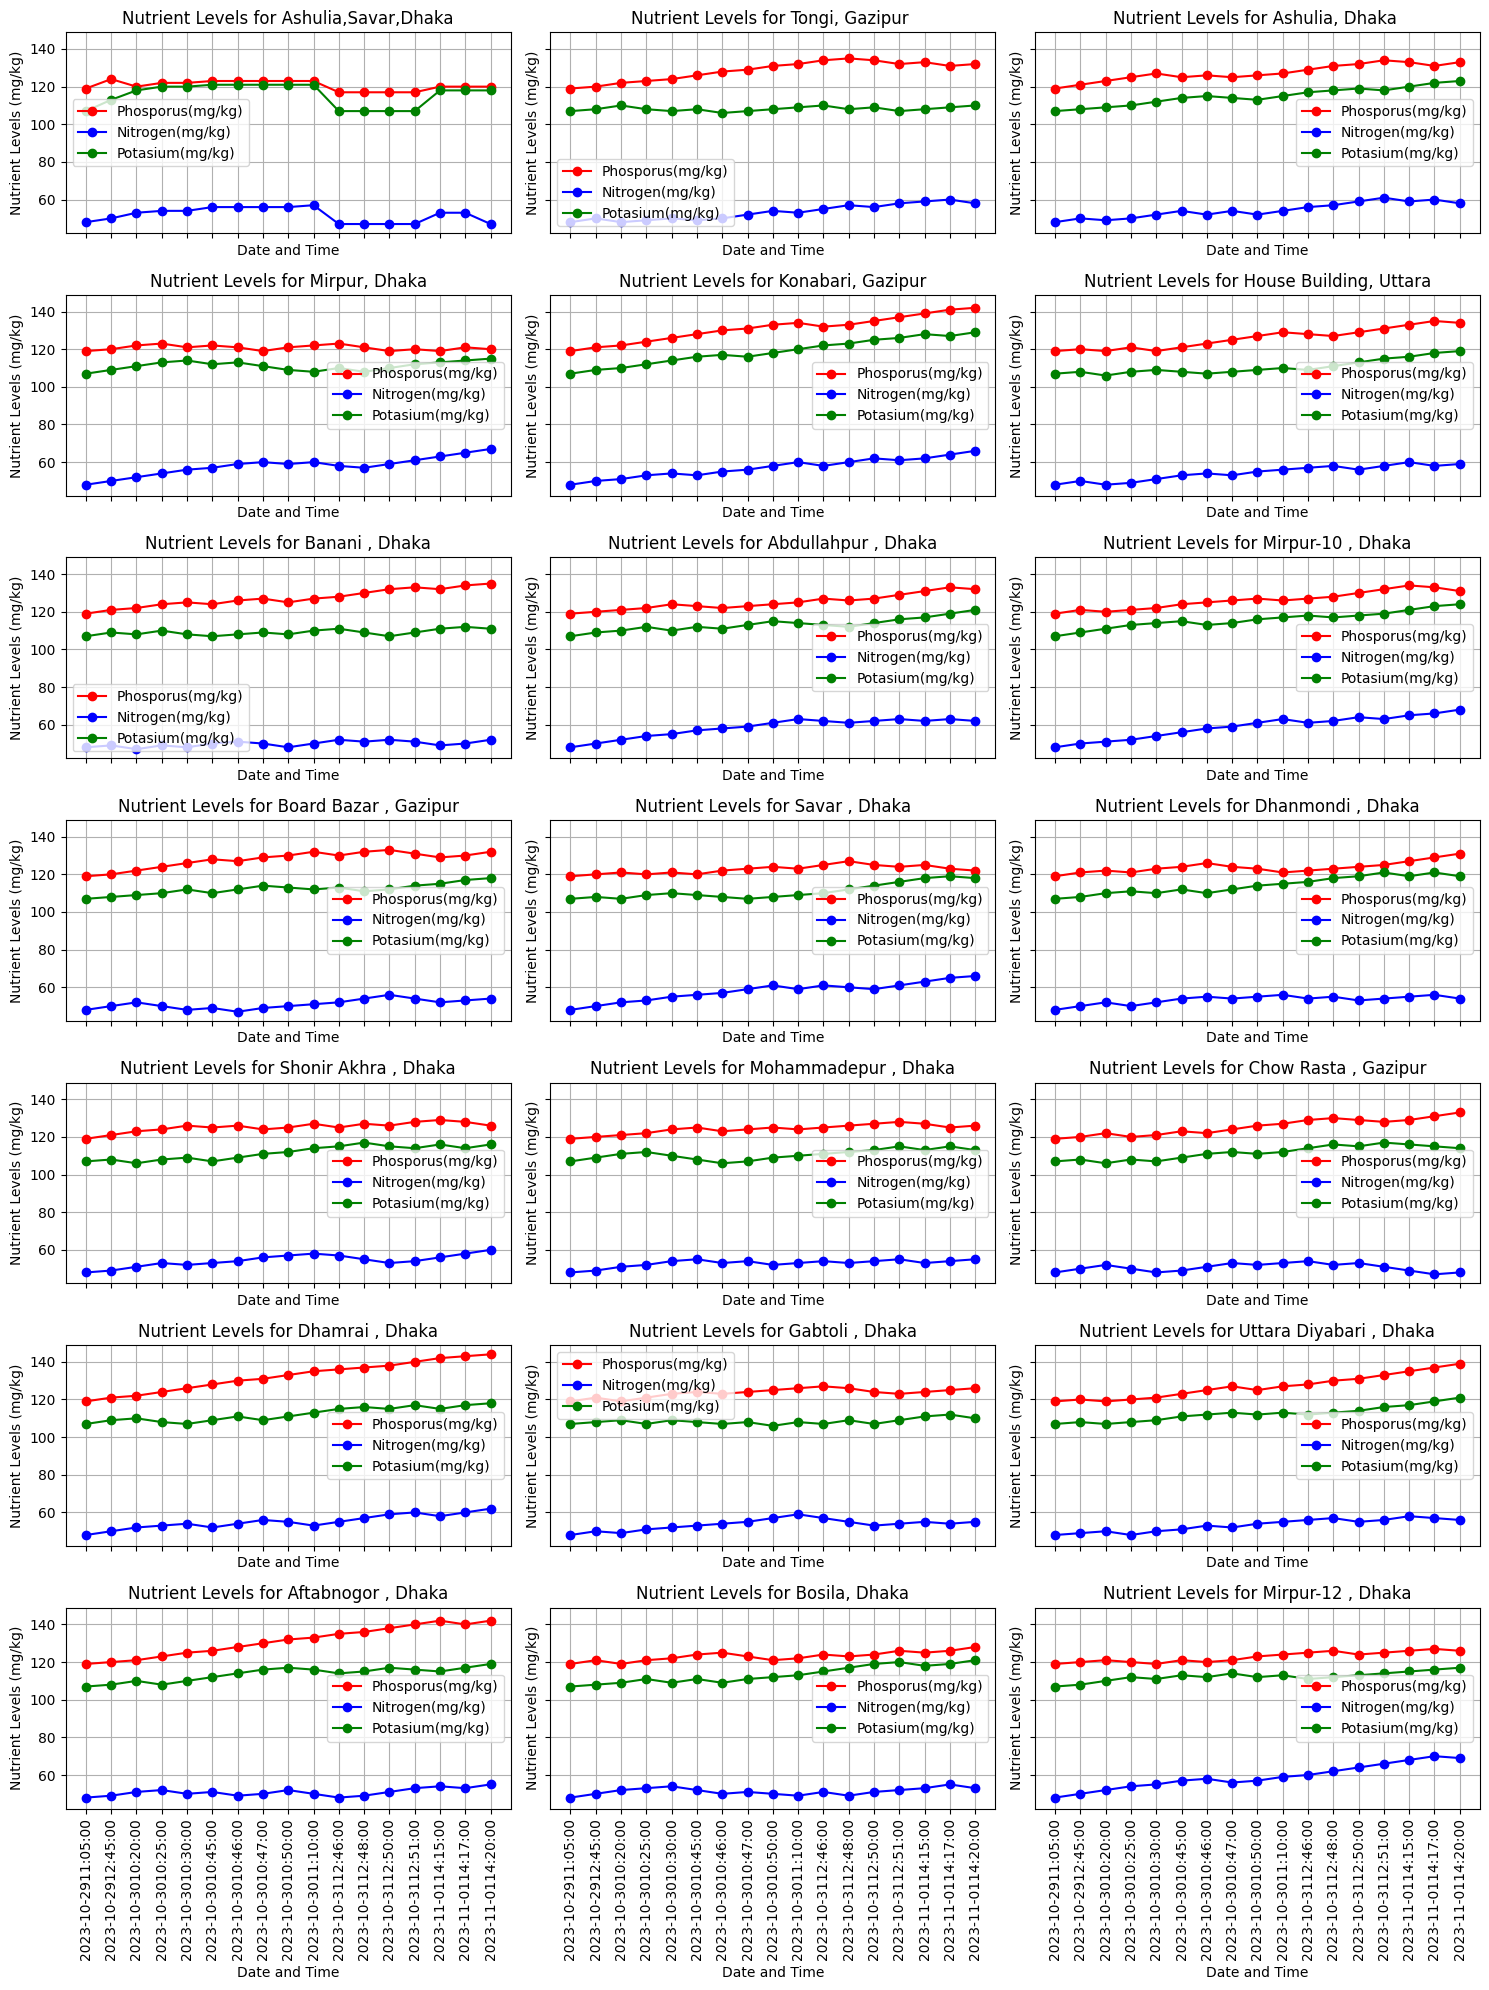

In [150]:
locations = []
locations = df['Location'].unique()

num_subplots = len(locations)
num_rows = (num_subplots - 1)// 3 + 1
num_cols = min(3, num_subplots)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15,20), sharex=True, sharey=True)
axs = axs.flatten()


for i, location in enumerate(locations):
    ax = axs[i]
    data = df[df['Location'] == location]
    ax.plot(data['Date']+ '' + data['Time'], data['Phosporus(mg/kg)'],label='Phosporus(mg/kg)', color='red', marker='o')
    ax.plot(data['Date']+ '' + data['Time'], data['Nitrogen(mg/kg)'],label='Nitrogen(mg/kg)', color='blue', marker='o')
    ax.plot(data['Date']+ '' + data['Time'], data['Potasium(mg/kg)'],label='Potasium(mg/kg)', color='green', marker='o')

    ax.set_title(f'Nutrient Levels for {location}')
    ax.set_ylabel('Nutrient Levels (mg/kg)')
    ax.legend()
    ax.grid(True)

    ax.set_xlabel('Date and Time')
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
if num_subplots < num_rows*num_cols:
    for i in range(num_subplots, num_rows * num_cols):
        fig.delaxes(axs[i])
plt.show()


**FEATURE EXTRACTION:** We calculate Nutrients level change compared to initial value(before fertilizer was added) for each observation

---



In [151]:
df['Change in Nitrogen'] = df['Nitrogen(mg/kg)'] - df['Nitrogen(mg/kg)'].iloc[0]
df['Change in Phosporus'] = df['Phosporus(mg/kg)'] - df['Phosporus(mg/kg)'].iloc[0]
df['Change in Potasium'] = df['Potasium(mg/kg)'] - df['Potasium(mg/kg)'].iloc[0]

print(df.columns)

Index(['Unnamed: 0', 'Date', 'Time', 'Nitrogen(mg/kg)', 'Phosporus(mg/kg)',
       'Potasium(mg/kg)', 'Temperature', 'Moisture', 'Location',
       'Change in Nitrogen', 'Change in Phosporus', 'Change in Potasium'],
      dtype='object')


**ANALYSIS:** New dataframe that contains average of location based nutrients level wheather data, meaning for 20 location we get 20 observations or rows

---



In [152]:
grouped = df.groupby('Location')
means = grouped[['Change in Nitrogen','Change in Phosporus','Change in Potasium','Temperature','Moisture']].mean()

means.reset_index(inplace=True)
agg_df = means.copy()
print(agg_df)

                   Location  Change in Nitrogen  Change in Phosporus  \
0       Abdullahpur , Dhaka           10.352941             6.176471   
1        Aftabnogor , Dhaka            2.882353            12.176471   
2           Ashulia, Dhaka             6.411765             8.470588   
3       Ashulia,Savar,Dhaka            3.823529             1.588235   
4            Banani , Dhaka            1.823529             8.294118   
5     Board Bazar , Gazipur            3.117647             8.882353   
6             Bosila, Dhaka            3.352941             4.117647   
7      Chow Rasta , Gazipur            2.588235             6.470588   
8           Dhamrai , Dhaka            7.176471            13.294118   
9         Dhanmondi , Dhaka            5.352941             4.823529   
10          Gabtoli , Dhaka            5.588235             4.529412   
11   House Building, Uttara            6.294118             6.882353   
12        Konabari, Gazipur            9.117647            12.00

Visualization: Plot that represents influence or change of nutrient level after 4-6 days of observations for each location

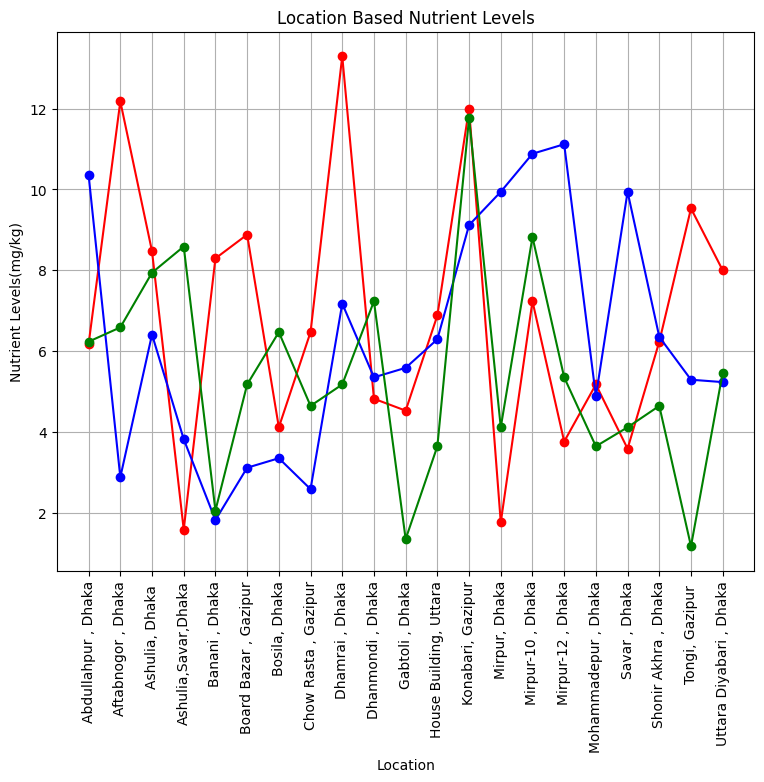

In [153]:
plt.figure(figsize=(9,7))
locations = agg_df['Location'].unique()
x = range(len(locations))

plt.plot (x, agg_df.groupby('Location')['Change in Phosporus'].mean(), label='Phosporus(mg/kg)',color='red',marker='o')
plt.plot (x, agg_df.groupby('Location')['Change in Nitrogen'].mean(), label='Nitrogen(mg/kg)',color='blue',marker='o')
plt.plot (x, agg_df.groupby('Location')['Change in Potasium'].mean(), label='Potassium(mg/kg)',color='green',marker='o')


plt.title('Location Based Nutrient Levels')
plt.xlabel('Location')
plt.ylabel('Nutrient Levels(mg/kg)')
plt.xticks(x, locations, rotation=90)
plt.grid(True)
plt.show()

**CLUSTERING: K MEANS CLUSTERING FOR NITROGEN LEVEL**

---



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


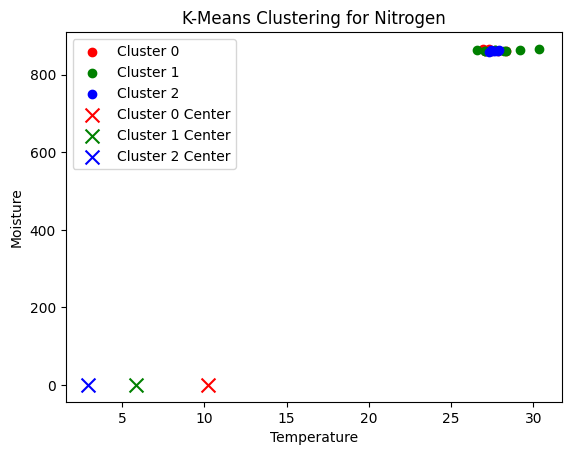


Cluster Means for Change in Nitrogen:
Nitrogen Cluster
0    10.225490
1     5.843137
2     2.931373
Name: Change in Nitrogen, dtype: float64


In [154]:
X = agg_df['Change in Nitrogen'].values.reshape(-1,1)
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, random_state=0).fit(X)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

agg_df['Nitrogen Cluster'] = cluster_labels
cluster_means = agg_df.groupby('Nitrogen Cluster')['Change in Nitrogen'].mean()

colors = ['r', 'g', 'b']
for cluster in range(n_clusters):
    plt.scatter(agg_df[agg_df['Nitrogen Cluster'] == cluster]['Temperature'],
                agg_df[agg_df['Nitrogen Cluster'] == cluster]['Moisture'],
                label = f'Cluster {cluster}', c=colors[cluster])

for cluster, center in enumerate(cluster_centers):
    plt.scatter(center, 0, label=f'Cluster {cluster} Center', marker='x', s=100, c=colors[cluster])

plt.xlabel('Temperature')
plt.ylabel('Moisture')
plt.legend()
plt.title('K-Means Clustering for Nitrogen')
plt.show()

print("\nCluster Means for Change in Nitrogen:")
print(cluster_means)

**CLUSTERING: K MEANS CLUSTERING FOR PHOSPORUS LEVEL**

---



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


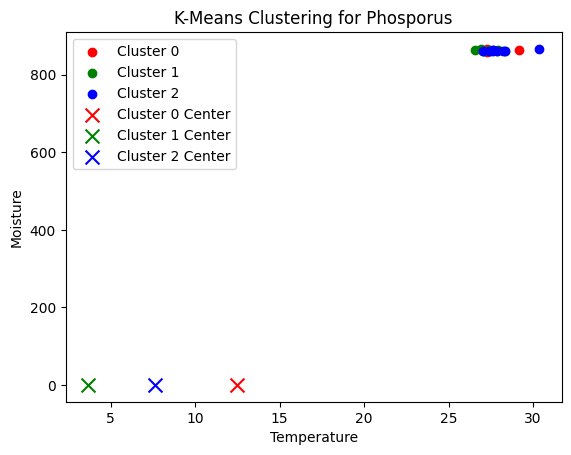


Cluster Means for Change in Phosporus:
Phosporus Cluster
0    12.490196
1     3.669118
2     7.617647
Name: Change in Phosporus, dtype: float64


In [155]:
X = agg_df['Change in Phosporus'].values.reshape(-1,1)
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, random_state=0).fit(X)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

agg_df['Phosporus Cluster'] = cluster_labels
cluster_means = agg_df.groupby('Phosporus Cluster')['Change in Phosporus'].mean()

colors = ['r', 'g', 'b']
for cluster in range(n_clusters):
    plt.scatter(agg_df[agg_df['Phosporus Cluster'] == cluster]['Temperature'],
                agg_df[agg_df['Phosporus Cluster'] == cluster]['Moisture'],
                label = f'Cluster {cluster}', c=colors[cluster])

for cluster, center in enumerate(cluster_centers):
    plt.scatter(center, 0, label=f'Cluster {cluster} Center', marker='x', s=100, c=colors[cluster])

plt.xlabel('Temperature')
plt.ylabel('Moisture')
plt.legend()
plt.title('K-Means Clustering for Phosporus')
plt.show()

print("\nCluster Means for Change in Phosporus:")
print(cluster_means)

**CLUSTERING: K MEANS CLUSTERING FOR POTASSIUM**

---



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


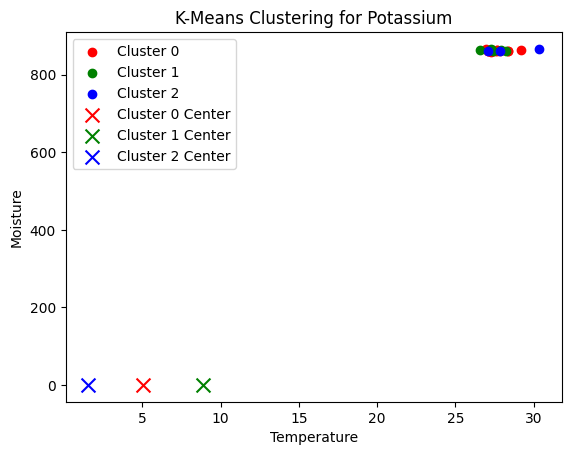


Cluster Means for Change in Potassium:
Potasium Cluster
0    5.022624
1    8.870588
2    1.529412
Name: Change in Potasium, dtype: float64


In [156]:
X = agg_df['Change in Potasium'].values.reshape(-1,1)
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, random_state=0).fit(X)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

agg_df['Potasium Cluster'] = cluster_labels
cluster_means = agg_df.groupby('Potasium Cluster')['Change in Potasium'].mean()

colors = ['r', 'g', 'b']
for cluster in range(n_clusters):
    plt.scatter(agg_df[agg_df['Potasium Cluster'] == cluster]['Temperature'],
                agg_df[agg_df['Potasium Cluster'] == cluster]['Moisture'],
                label = f'Cluster {cluster}', c=colors[cluster])

for cluster, center in enumerate(cluster_centers):
    plt.scatter(center, 0, label=f'Cluster {cluster} Center', marker='x', s=100, c=colors[cluster])

plt.xlabel('Temperature')
plt.ylabel('Moisture')
plt.legend()
plt.title('K-Means Clustering for Potassium')
plt.show()

print("\nCluster Means for Change in Potassium:")
print(cluster_means)

**CLUSTERING K_MENS CLUSTERING FOR NITROGEN, PHOSPORUS AND POTASSIUM LEVEL COMBINED**

---



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-157-ef1b1573fec1>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_means = agg_df.groupby('Combined Cluster')['Change in Nitrogen','Change in Potasium','Change in Phosporus'].mean()


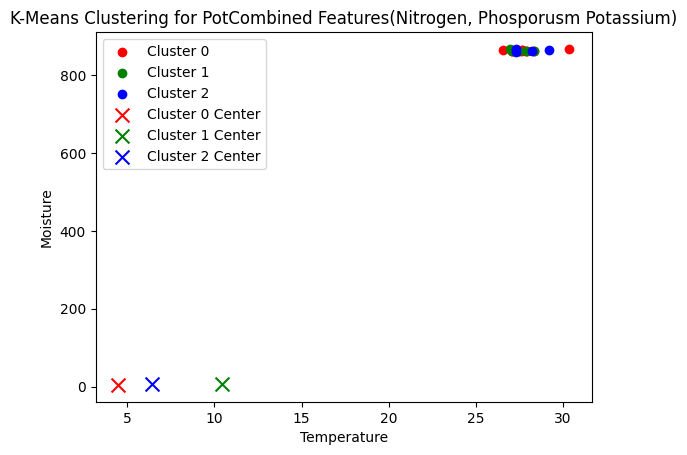


Cluster Means for Combined Features:
                  Change in Nitrogen  Change in Potasium  Change in Phosporus
Combined Cluster                                                             
0                           4.475490            4.509804             6.210784
1                          10.447059            5.729412             4.505882
2                           6.397059            7.867647            11.485294


In [157]:
X = agg_df[['Change in Nitrogen','Change in Potasium','Change in Phosporus']]
n_clusters = 3

kmeans = KMeans(n_clusters = n_clusters, random_state=0).fit(X)

cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

agg_df['Combined Cluster'] = cluster_labels
cluster_means = agg_df.groupby('Combined Cluster')['Change in Nitrogen','Change in Potasium','Change in Phosporus'].mean()

colors = ['r', 'g', 'b']
for cluster in range(n_clusters):
    plt.scatter(agg_df[agg_df['Combined Cluster'] == cluster]['Temperature'],
                agg_df[agg_df['Combined Cluster'] == cluster]['Moisture'],
                label = f'Cluster {cluster}', c=colors[cluster])

for cluster, center in enumerate(cluster_centers):
    plt.scatter(center[0],center[1], label=f'Cluster {cluster} Center', marker='x', s=100, c=colors[cluster])

plt.xlabel('Temperature')
plt.ylabel('Moisture')
plt.legend()
plt.title('K-Means Clustering for PotCombined Features(Nitrogen, Phosporusm Potassium)')
plt.show()

print("\nCluster Means for Combined Features:")
print(cluster_means)

Download the clustered dataset

In [158]:
agg_df.to_csv('agricultureof.csv', index=False)
files.download('agricultureof.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CLUSTERING: DBSCAN CLUSTERING FOR NITROGEN LEVEL

---



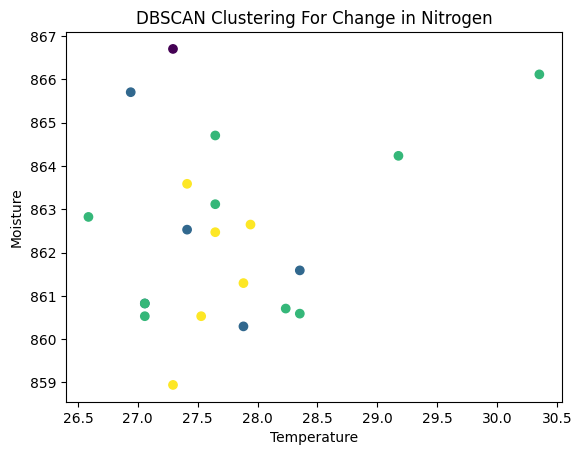

Number of Clusters: 3
Number of Noise Points: 1


In [159]:
X= agg_df[['Change in Nitrogen']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.3, min_samples=5).fit(X_scaled)

agg_df['Nitrogen DBSCAN Cluster']= dbscan.labels_

plt.scatter(agg_df['Temperature'], agg_df['Moisture'], c=agg_df['Nitrogen DBSCAN Cluster'])
plt.xlabel('Temperature')
plt.ylabel('Moisture')
plt.title('DBSCAN Clustering For Change in Nitrogen')
plt.show()

n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)
print(f'Number of Clusters: {n_clusters}')
print(f'Number of Noise Points: {n_noise}')

**CLUSTERING: DBSCAN CLUSTERING FOR PHOSPORUS LEVEL**

---



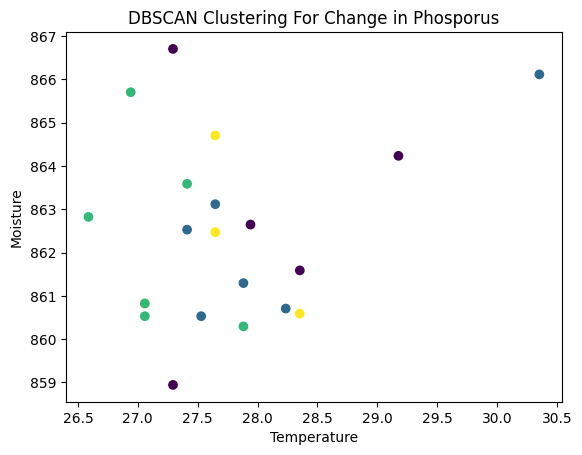

Number of Clusters: 3
Number of Noise Points: 5


In [160]:
X= agg_df[['Change in Phosporus']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.3, min_samples=5).fit(X_scaled)

agg_df['Phosporus DBSCAN Cluster']= dbscan.labels_

plt.scatter(agg_df['Temperature'], agg_df['Moisture'], c=agg_df['Phosporus DBSCAN Cluster'])
plt.xlabel('Temperature')
plt.ylabel('Moisture')
plt.title('DBSCAN Clustering For Change in Phosporus')
plt.show()

n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)
print(f'Number of Clusters: {n_clusters}')
print(f'Number of Noise Points: {n_noise}')

**CLUSTERING: DBSCAN CLUSTERING FOR POTASSIUM LEVEL**

---



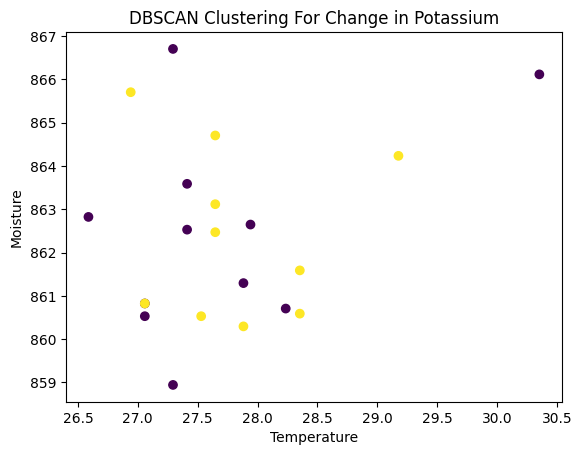

Number of Clusters: 1
Number of Noise Points: 11


In [161]:
X= agg_df[['Change in Potasium']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.3, min_samples=5).fit(X_scaled)

agg_df['Potasium DBSCAN Cluster']= dbscan.labels_

plt.scatter(agg_df['Temperature'], agg_df['Moisture'], c=agg_df['Potasium DBSCAN Cluster'])
plt.xlabel('Temperature')
plt.ylabel('Moisture')
plt.title('DBSCAN Clustering For Change in Potassium')
plt.show()

n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)
print(f'Number of Clusters: {n_clusters}')
print(f'Number of Noise Points: {n_noise}')